<a href="https://colab.research.google.com/github/dgwalters-1974/perceptron_fun/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First thing to do is to import some modules that will be needed later when we get coding. Pandas, Numpy and Matplotlib will be used to play with the data (vectors, matrices and plotting them to see what's going on) and SciKit Learn will help with generating some data. Don't pay too much attention to this right now - just run the cell so that everything that follows works smoothly.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn import datasets

# Generate data

Right let's start by generating some data and considering the problem that we're going to solve...
The following two lines of code generate two 'blobs' of points in 2-D (think x, y plots) with each datapoint being either part of blob 1 (labelled '0') or blob 2 (labelled '1'). These datapoints are then split 80/20 into a 'training' and 'testing' set - the former is used by our model to 'learn' the parameters and the latter to see how well it generalises to 'unseen' data. This is pretty standard in the ML world where deciding which model to use can be tricky and so some kind of metric is needed.

In [36]:
# Generate 2 blobs of data
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=4, random_state=47)

# Randomly split the overall data (blobs 1 and 2) into  'training' (80%) and 'test' (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=74)

The following cell plots these datapoints on the (x, y) axes with the different categories shown as different colours (plot includes both train and test sets):

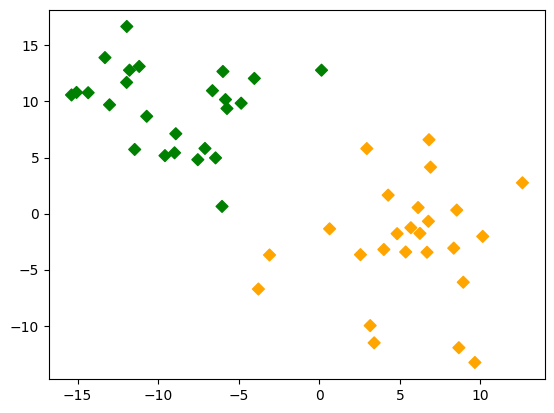

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colors = ['green', 'orange']
plt.scatter(X_train[:, 0], X_train[:, 1], marker="D", c=y_train, cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(X_test[:, 0], X_test[:, 1], marker="D", c=y_test, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()

# The Perceptron model

Text describing the Perceptron model...

# Coding the model

There are a number of ways to turn the above into Python code but the most self contained and readable is to create a 'perceptron' class. This is infinitely reusable and if we follow the same fit / predict language and methodology of Scikit Learn package, our code will be consistent with a lot of the ML models that are already commonplace.

In [41]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n=10):

        # lr controls the speed at which the parameters are updated
        self.lr = learning_rate

        # n is the number of 'epochs' that the model will run for = number of times the whole dataset is shown to the model
        # restrict to 1 for now as we expect model to converge quickly & easier to keep track of
        self.n = n

        # see below
        self.activation_func = self._unit_step_func

        # initial values of weights set during fit
        self.weights = None

        # initial value of bias set during fit
        self.bias = None

        # store weights so that we can see how they change during the learning process
        self.weights_list = []


    def fit(self, X, y):
        n_samples, n_features = X.shape

        error=0

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.weights_list = []

        #y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n):

            for i, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)


                # Perceptron update rule
                error = y[i] - y_predicted
                update = self.lr * error

                print(f'ITER {i}:  Error: {error}; New weights: {self.weights}; New bias: {self.bias}; linear output: {linear_output};, y_predicted: {y_predicted};')

                self.weights += update * x_i
                self.bias += update

                self.weights_list.append(self.weights)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [42]:
p = Perceptron()
p.fit(X_train, y_train)

ITER 0:  Error: 0; New weights: [0. 0.]; New bias: 0; linear output: 0.0;, y_predicted: 1;
ITER 1:  Error: 0; New weights: [0. 0.]; New bias: 0.0; linear output: 0.0;, y_predicted: 1;
ITER 2:  Error: -1; New weights: [0. 0.]; New bias: 0.0; linear output: 0.0;, y_predicted: 1;
ITER 3:  Error: 0; New weights: [ 0.11949178 -0.16680705]; New bias: -0.01; linear output: -3.919537068822186;, y_predicted: 0;
ITER 4:  Error: 0; New weights: [ 0.11949178 -0.16680705]; New bias: -0.01; linear output: 0.2260371602265206;, y_predicted: 1;
ITER 5:  Error: 0; New weights: [ 0.11949178 -0.16680705]; New bias: -0.01; linear output: -1.6080697103865291;, y_predicted: 0;
ITER 6:  Error: 0; New weights: [ 0.11949178 -0.16680705]; New bias: -0.01; linear output: -2.1261339362971037;, y_predicted: 0;
ITER 7:  Error: 0; New weights: [ 0.11949178 -0.16680705]; New bias: -0.01; linear output: 1.5006896170534185;, y_predicted: 1;
ITER 8:  Error: 0; New weights: [ 0.11949178 -0.16680705]; New bias: -0.01; line

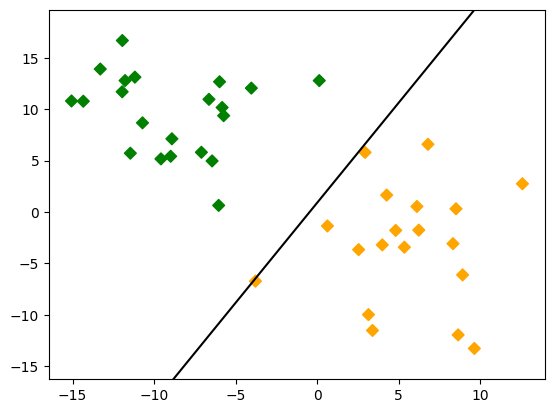

In [43]:
# Plot train data with seperating line / 'decision boundary'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colors = ['green', 'orange']
plt.scatter(X_train[:, 0], X_train[:, 1], marker="D", c=y_train, cmap=matplotlib.colors.ListedColormap(colors))

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

# Checking the model on unseen data

Now the model is fed the subset of data that was withheld for testing. We can compare the class prediction from the model with the 'ground truth' labels that we already know to obtain an accuracy score:

In [44]:
# Calculate accuracy of predictions on test set:
accuracy = sum(p.predict(X_test) == y_test) / len(X_test)
print(f'Accuracy: {accuracy *100}%')

Accuracy: 90.0%


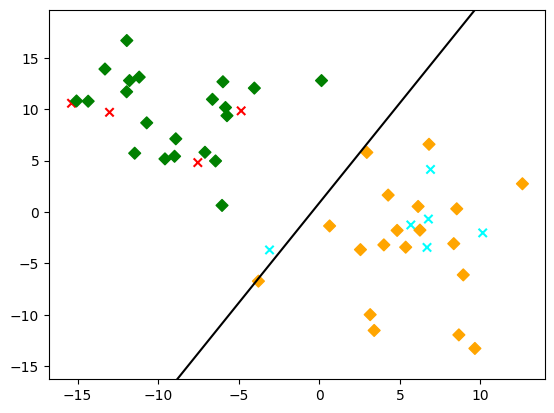

In [45]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
colors = ['green', 'orange']
colors_test = ['red', 'cyan']
plt.scatter(X_test[:, 0], X_test[:, 1], marker="x", c=y_test, cmap=matplotlib.colors.ListedColormap(colors_test))
plt.scatter(X_train[:, 0], X_train[:, 1], marker="D", c=y_train, cmap=matplotlib.colors.ListedColormap(colors))


x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()

In [46]:
p.weights

array([ 0.15335085, -0.07885179])